The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"data/nobel.csv", delimiter=';')  # Change delimiter as needed
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",01/01/2024,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",01/01/2024,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",01/01/2024,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,01/02/2024,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,01/02/2024,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# What is the most commonly awarded gender and birth country?

In [2]:
# Find the most commonly awarded gender by counting the occurrences of each value in the "sex" column
top_gender = df["sex"].value_counts().idxmax()
print(f"The most commonly awarded gender is: {top_gender}")

# Find the most commonly awarded birth country by counting the occurrences of each value in the "birth_country" column
top_country = df["birth_country"].value_counts().idxmax()
print(f"The most commonly awarded birth country is: {top_country}")

The most commonly awarded gender is: Male
The most commonly awarded birth country is: United States of America


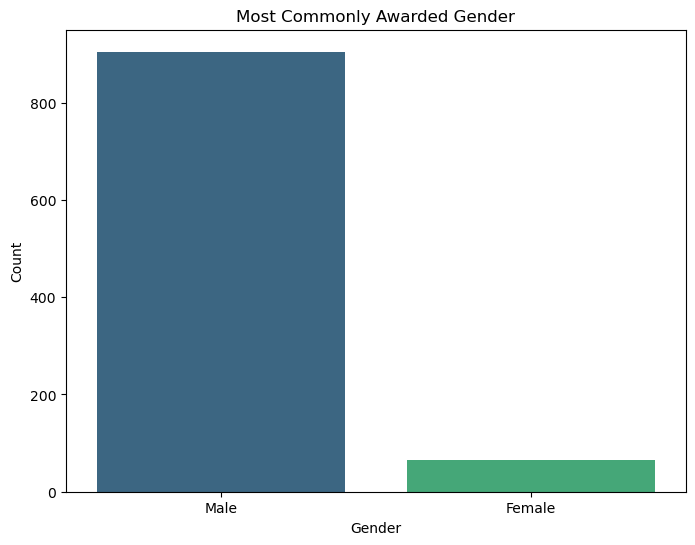

In [3]:
# Calculate counts of each gender
gender_counts = df["sex"].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title("Most Commonly Awarded Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

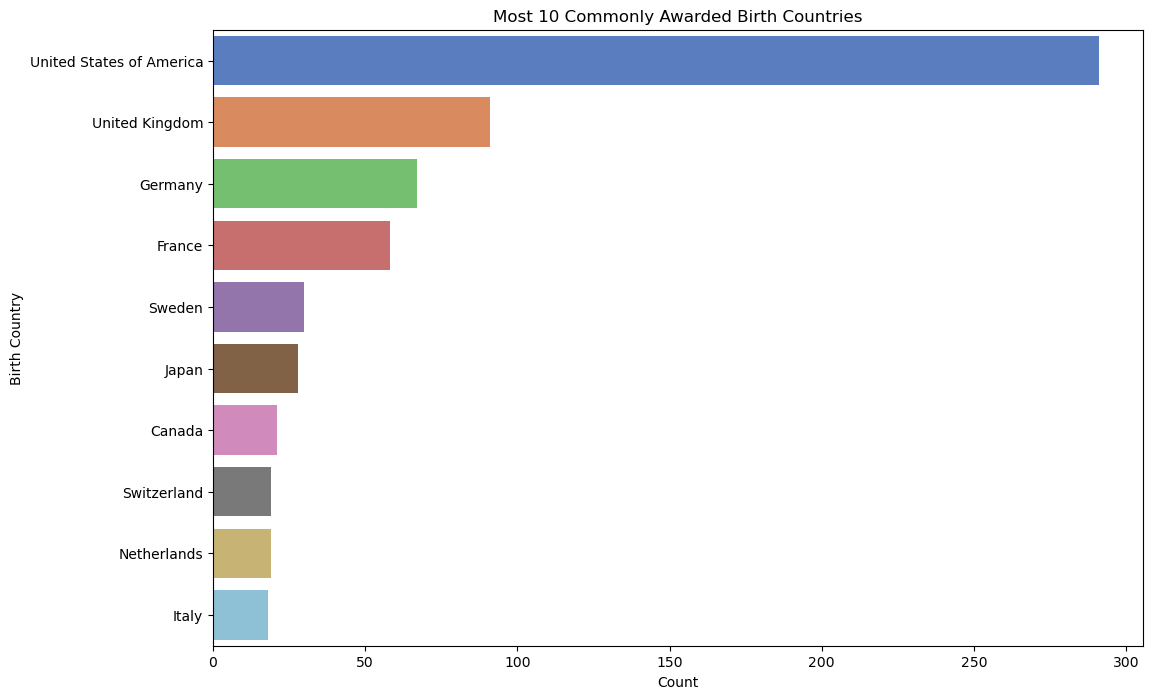

In [4]:
# Calculate counts of each birth country
country_counts = df["birth_country"].value_counts().nlargest(10)  

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="muted")
plt.title("Most 10 Commonly Awarded Birth Countries")
plt.xlabel("Count")
plt.ylabel("Birth Country")
plt.show()

# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [5]:
# Filter the DataFrame for entries with birth country as "United States of America" or "USA"
df_usa = df[(df["birth_country"] == "United States of America") | (df["birth_country"] == "USA")]

# Create a new column for the decade
df_usa = df_usa.copy()  
df_usa['decade'] = (df_usa['year'] // 10) * 10

# Group by the decade and count the number of rows in each group
max_decade_usa = df_usa.groupby('decade').size().idxmax()
print(f"the decade that have the highest ratio is : {max_decade_usa}")

the decade that have the highest ratio is : 2000


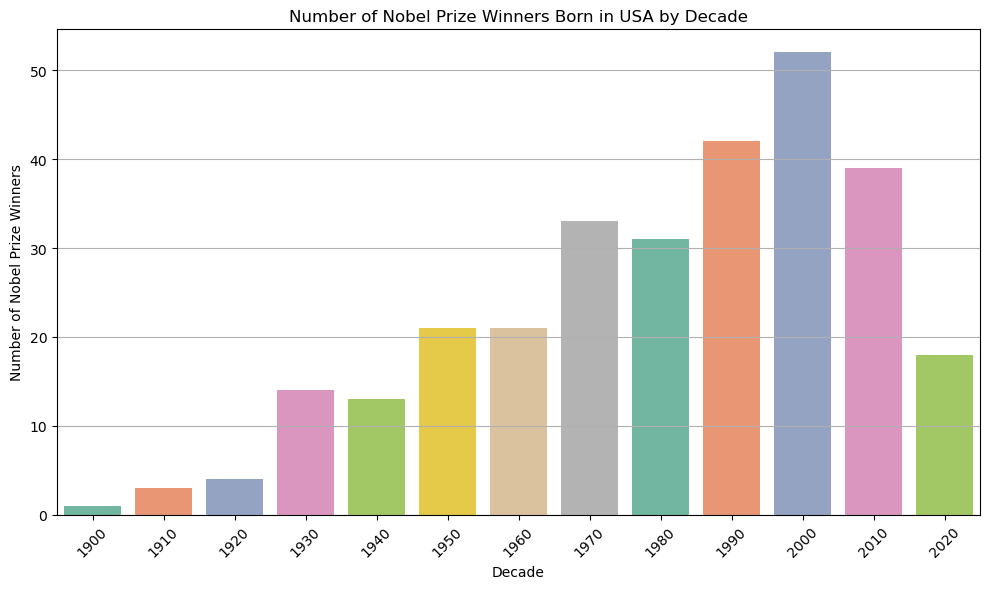

In [6]:
# Calculate the number of winners per decade
decade_counts = df_usa.groupby('decade').size()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="Set2")
plt.title("Number of Nobel Prize Winners Born in USA by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Nobel Prize Winners")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [7]:
# # Filter the DataFrame to include only female laureates
# df_female = df[df["sex"] == "Female"]

# # Create a new column for the decade in the filtered DataFrame to avoid SettingWithCopyWarning
# df_female = df_female.copy()  
# df_female['decade'] = (df_female['year'] // 10) * 10

# # Find the decade with the highest number of female laureates
# max_decade_female = df_female.groupby('decade').size().idxmax()
# print(f"The decade that has the highest number of female laureates: {max_decade_female}")

# # Find the category with the highest number of female laureates
# most_female_category = df_female.groupby('category').size().idxmax()
# print(f"The most common category for female laureates is: {most_female_category}")

# # Create a dictionary with the decade and the most common category for female laureates
# max_female_dict = {max_decade_female: most_female_category}
# max_female_dict

In [8]:
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)

# Calculating the proportion of female laureates per decade
df['female_winner'] = df['sex'] == 'Female'
prop_female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

print(max_female_dict)

{2020: 'Literature'}


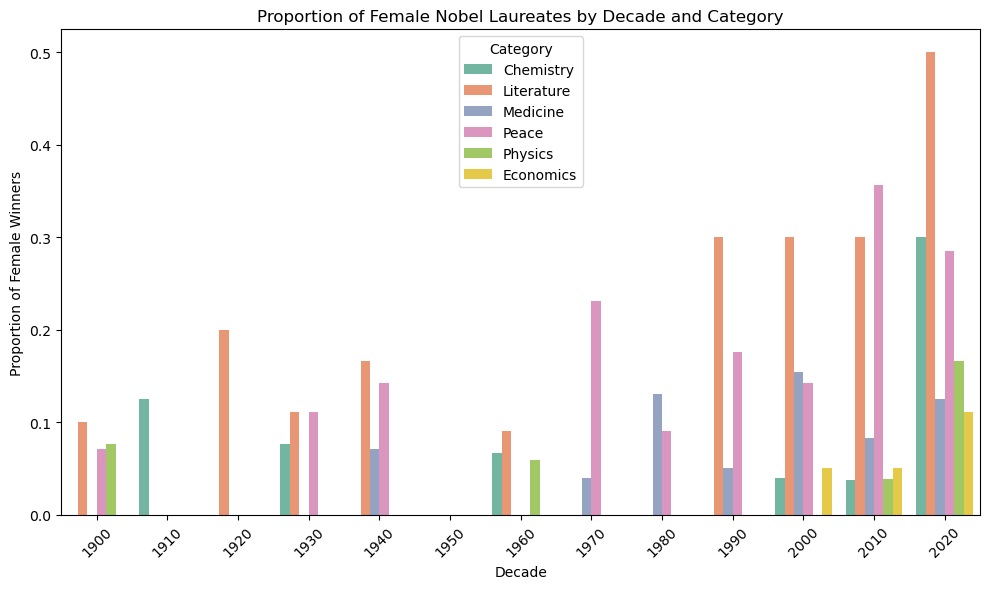

In [9]:
# Visualization: Bar plot of proportion of female winners by decade and category
plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, palette='Set2')
plt.title('Proportion of Female Nobel Laureates by Decade and Category')
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Winners')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Who was the first woman to receive a Nobel Prize, and in what category?

In [10]:
# Filter the DataFrame to include only female laureates and sort by the "year" column
df_female = df[df["sex"] == "Female"].sort_values("year")

# Extract the name of the first female laureate
first_woman_name = df_female["full_name"].iloc[0]
print(f"the name of the first female laureate: {first_woman_name}")

# Extract the category of the first female laureate
first_woman_category = df_female["category"].iloc[0]
print(f"the category of the first female laureate: {first_woman_category}")

the name of the first female laureate: Marie Curie, née Sklodowska
the category of the first female laureate: Physics


# Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [11]:
# Get duplicated full_names as a list
individuals = df[df["full_name"].duplicated()]["full_name"].drop_duplicates()

# Count the occurrences of each organization in the DataFrame
organization_counts = df["organization_name"].value_counts()

# Filter for organizations that appear at least twice and get their names as a list
organization_counts_filtered = organization_counts[organization_counts >= 2].index.tolist()

# Create the 1D list repeat_list
repeat_list = list(individuals)
print(len(repeat_list))
print(repeat_list)

6
['Marie Curie, née Sklodowska', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


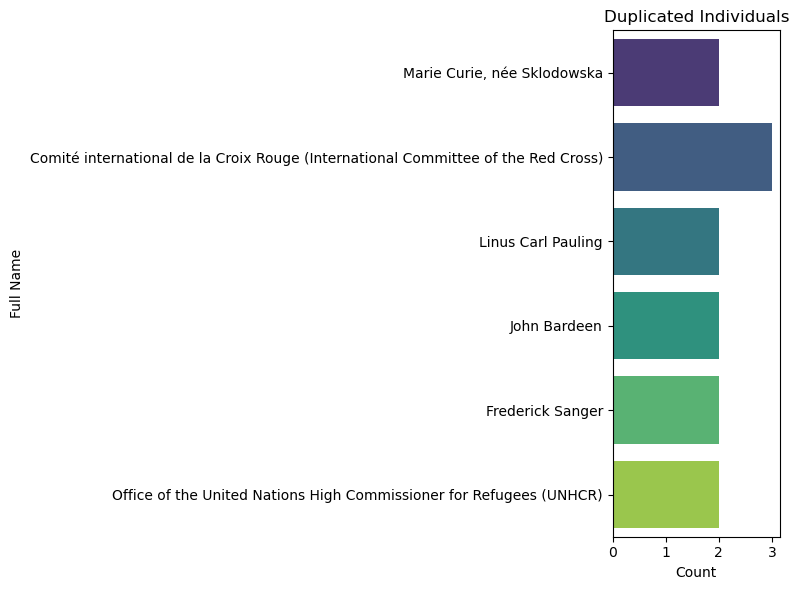

In [12]:
# Visualization: Count plot of duplicated individuals
plt.figure(figsize=(8, 6))
sns.countplot(y='full_name', data=df[df['full_name'].isin(repeat_list)], palette='viridis', order=repeat_list)
plt.title('Duplicated Individuals')
plt.xlabel('Count')
plt.ylabel('Full Name')
plt.tight_layout()
plt.show()